In [1]:
from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin
from canny import canny_edge_detector
from collections import defaultdict
from corrLib import readdata
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '/home/zhengyang/data/DE/10262021'
l = readdata(os.path.join(folder, '12'), 'tif')
num_images = len(l)
print('Total {:d} frames'.format(num_images))

Total 30500 frames


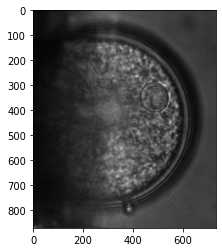

In [3]:
input_image = Image.open(l.Dir[1500])
plt.imshow(input_image, cmap='gray')

In [4]:
# Output image:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

# Find circles
rmin = 50
rmax = 70
steps = 100
threshold = 0.4

points = []
for r in range(rmin, rmax + 1):
    for t in range(steps):
        points.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))

acc = defaultdict(int)
for x, y in canny_edge_detector(input_image):
    for r, dx, dy in points:
        a = x - dx
        b = y - dy
        acc[(a, b, r)] += 1

circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

# Save output image
output_image.save("result.png")

KeyboardInterrupt: 